In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum03/"

In [3]:
import pandas as pd

df = pd.read_csv(path + "data/day.csv", sep=",")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
df1 = df.drop(["instant", "dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"], axis=1)
df1.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
corr_matrix = df1.corr()
print(corr_matrix)

                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012   
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192   
hum         0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089   
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449   
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282   
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000   
cnt         0.627494  0.631066 -0.100659  -0.234545  0.672804    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.100659  
windspeed  -0.234545  
casual      0.672804  
registered  0.945517  
cnt         1.000000  


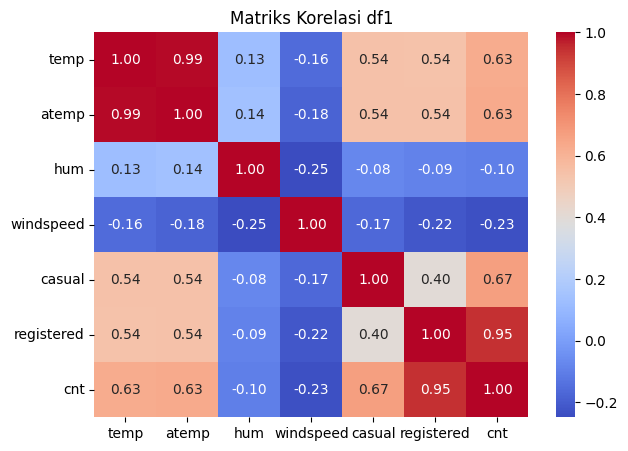

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

y = df["cnt"]

X = df[["casual", "registered"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))
X_train.head()

Jumlah data train : 584
Jumlah data test  : 147


,casual,registered
682,327,3767
250,153,1689
336,706,2908
260,1353,2921
543,1077,6258


In [8]:
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,casual,registered
682,1.0,327,3767
250,1.0,153,1689
336,1.0,706,2908
260,1.0,1353,2921
543,1.0,1077,6258


In [10]:
import statsmodels.api as sm
#Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-------')
print(model.params)
print('-------')
const = model.params['const']
x1_umur = model.params['casual']
x2_tinggi = model.params['registered']
#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-------
const         1.159606e-11
casual        1.000000e+00
registered    1.000000e+00
dtype: float64
-------
y = 0.000 + 1.000*x1 + 1.000*x2


In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.302e+31
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:09:20   Log-Likelihood:                 14432.
No. Observations:                 584   AIC:                        -2.886e+04
Df Residuals:                     581   BIC:                        -2.884e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.16e-11   4.89e-13     23.702      0.0